**Due: 4 PM on Wednesday, 24 Feb 2016**

The usual warnings apply - the homework is not officially released until 18 Feb 2016, and we may make changes till then.

Instructions
-----

Write code to solve all problems. The grading rubric includes the following criteria:

- Correctness
- Readability
- Efficiency

Please do not copy answers found on the web or elsewhere as it will not benefit your learning. Searching the web for general references etc is OK. Some discussion with friends is fine too - but again, do not just copy their answer. 

**Honor Code: By submitting this assignment, you certify that this is your original work.**

In [1]:
%precision 2

'%.2f'

**Question 1 (25 points).** Consider the following function on $\mathbb{R}^2$:

$$f(x_1,x_2) = -x_1x_2e^{-\frac{(x_1^2+x_2^2)}{2}}$$

1. Use `sympy` to compute its gradient.
2. Compute the Hessian matrix. 
3. Find the critical points of $f$.
4. Characterize the critical points as max/min or neither. Find the minimum under the constraint 
$$g(x) = x_1^2+x_2^2 \leq 10$$
and 
$$h(x) = 2x_1 + 3x_2 = 5$$ using `scipy.optimize.minimize`.
5. Plot the function using `matplotlib`.


In [2]:
from sympy import symbols, Matrix, Function, simplify, exp, hessian, solve, init_printing
init_printing()

x1, x2 = symbols('x1 x2')
f, g, h = symbols('f g h', cls=Function)

X = Matrix([x1,x2])
f = Matrix([-x1*x2*exp(-(x1**2 + x2**2)/2)])
h = 2*x1 + 3*x2
g =  x1**2 + x2**2 - 10

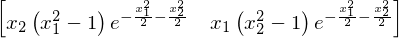

In [3]:
gradf = simplify(f.jacobian(X))
gradf

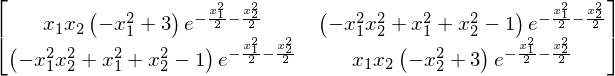

In [4]:
hessianf = simplify(hessian(f, X))
hessianf

In [5]:
import scipy.linalg as la

def characterize_cp(H):
    l,v = la.eig(H)
    if(np.all(np.greater(l,np.zeros(2)))):
       return("minimum")
    elif(np.all(np.less(l,np.zeros(2)))):
       return("maximum")
    else:
       return("saddle")

In [6]:
crit = solve(gradf, X)

In [7]:
for x in crit:
    H = np.array(hessianf.subs(dict(zip(X, x)))).astype('float')
    print(x, characterize_cp(H))

(-1, -1) minimum
(-1, 1) maximum
(0, 0) saddle
(1, -1) maximum
(1, 1) minimum


In [8]:
import scipy.optimize as opt

def f(x):
    return -x[0] * x[1] * np.exp(-(x[0]**2 + x[1]**2)/2)

cons = ({'type': 'eq',
         'fun' : lambda x: np.array([2.0*x[0] + 3.0*x[1] - 5.0]),
         'jac' : lambda x: np.array([2.0,3.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([-x[0]**2.0 - x[1]**2.0 + 10.0])})

x0 = [1.5,1.5]
cx = opt.minimize(f, x0, constraints=cons)
cx

     jac: array([-0.,  0.,  0.])
    nfev: 16
  status: 0
     nit: 4
 message: 'Optimization terminated successfully.'
    njev: 4
       x: array([ 1.,  1.])
     fun: -0.36787932833276132
 success: True

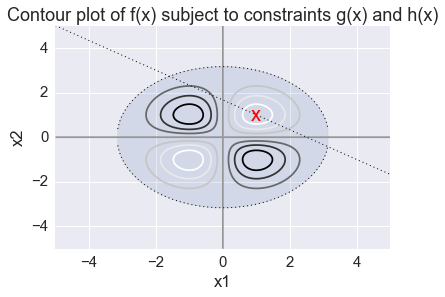

In [9]:
%matplotlib inline

x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((200,200))

plt.contour(X, Y, Z)

plt.plot(x, (5-2*x)/3, 'k:', linewidth=1)
plt.plot(x, (10.0-x**2)**0.5, 'k:', linewidth=1)
plt.plot(x, -(10.0-x**2)**0.5, 'k:', linewidth=1)
plt.fill_between(x,(10-x**2)**0.5,-(10-x**2)**0.5,alpha=0.15)
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.axis([-5,5,-5,5])
plt.title('Contour plot of f(x) subject to constraints g(x) and h(x)')
plt.xlabel('x1')
plt.ylabel('x2')
pass

**Question 2 (15 points).**

A milkmaid is at point A and needs to get to point B. However, she also needs to fill a pail of water from the river en route from A to B. The equation of the river's path is shown in the figure below. What is the minimum distance she has to travel to do this?

1. Solve using `scipy.optimize` and constrained minimization.
2. Create a plot of the solution using matplotlib.

![Milkmaid problem](milkmaid.png)

In [10]:
def f(x, A, B):
    return la.norm(x-A) + la.norm(x-B)

A = np.array([2,8])
B = np.array([8,4])
cons = {'type': 'eq', 'fun': lambda x: x[1] - 10.0/(1 + x[0])}

sols = []
for x0 in np.random.uniform(0, 10, (10, 2)):
    sols.append(opt.minimize(f, x0, args=(A, B), constraints=cons))
sol = sorted(sols, key=lambda x: x.fun)[0]
sol

     jac: array([-1.65, -0.39,  0.  ])
    nfev: 76
  status: 0
     nit: 17
 message: 'Optimization terminated successfully.'
    njev: 17
       x: array([ 0.53,  6.53])
     fun: 9.963398302192134
 success: True

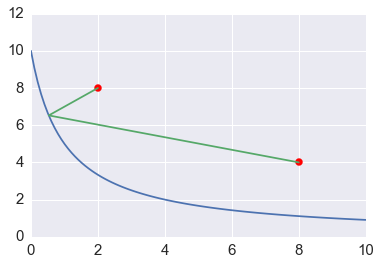

In [11]:
x = np.linspace(0, 10, 100)
plt.plot(x, 10/(1+x))
plt.scatter([2,8], [8,4], s=50, color='red')
plt.plot([2, sol.x[0], 8], [8, sol.x[1], 4])
plt.xlim([0, 10])
pass

Background to Q3 - Q5
----

Latent Semantic Analysis (LSA) is a method for reducing the dimnesionality of documents treated as a bag of words. It is used for document classification, clustering and retrieval. For example, LSA can be used to search for prior art given a new patent application. In this homework, we will implement a small library for simple latent semantic analysis as a practical example of the application of SVD. The ideas are very similar to PCA.

We will implement a toy example of LSA to get familiar with the ideas. If you want to use LSA or similar methods for statiscal language analyis, the most efficient Python library is probably [gensim](https://radimrehurek.com/gensim/) - this also provides an online algorithm - i.e. the training information can be continuously updated. Other useful functions for processing natural language can be found in the [Natural Lnaguage Toolkit](http://www.nltk.org/).

**Note**: The SVD from scipy.linalg performs a full decomposition, which is inefficient since we only need to decompose until we get the first k singluar values. If the SVD from `scipy.linalg` is too slow, please use the `sparsesvd` function from the [sparsesvd](https://pypi.python.org/pypi/sparsesvd/) package to perform SVD instead.  You can install in the usual way with 
```
!pip install sparsesvd
```

Then import the following
```python
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix 
```

and use as follows
```python
sparsesvd(csc_matrix(M), k=10)
```



**Question 3 (20 points)**: Write 3 functions to calculate the term frequency (tf), the inverse document frequency (idf) and the product (tf-idf). Each function should take a single argument `docs`, which is a dictionary of (key=identifier, value=dcoument text) pairs, and return an appropriately sized array. Convert '-' to ' ' (space), remove punctuation, convert text to lowercase and split on whitespace to generate a collection of terms from the dcoument text.

- tf = the number of occurrences of term $i$ in document $j$
- idf = $\log \frac{n}{1 + \text{df}_i}$ where $n$ is the total number of documents and $\text{df}_i$ is the number of documents in which term $i$ occurs.

Print the table of tf-idf values for the following document collection

```
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"

docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}
```

Note: You can use either a numpy array or pandas dataframe to store the matrix. However, we suggest using a Pnadas dataframe since that will allow you to keep track of the row (term) and column (document) names in a single object. Of course, you could also maintain a numpy matrix, a list of terms, and a list of documents separately if you prefer.





In [12]:
def tf_(doc):
    """Returns the number of times each term occurs in a dcoument.
    We preprocess the document to strip punctuation and convert to lowercase.
    Terms are found by splitting on whitespace."""
    from collections import Counter
    from string import punctuation

    terms = doc.lower().replace('-', ' ').translate(dict.fromkeys(map(ord, punctuation))).split()
    return Counter(terms)

def tf(docs):
    """Create a term freqeuncy dataframe from a dictionary of documents."""
    df = pd.DataFrame({k: tf_(v) for k, v in docs.items()}).fillna(0)
    return df

def idf(docs):
    """Find inverse document frequecny series from a dictionry of doucmnets."""
    term_freq = tf(docs)
    num_docs = len(docs)
    doc_freq = (term_freq > 0).sum(axis=1)
    return np.log(num_docs/(1 + doc_freq))

def tf_idf(docs):
    """Return the product of the term-frequency and inverse document freqeucny."""
    return tf(docs).mul(idf(docs), axis=0)

In [13]:
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"

docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}

tf_idf(docs)

,s1,s2,s3,s4
brown,0.287682,0.287682,0.000000,0.000000
dog,0.000000,0.000000,0.287682,0.287682
elephant,0.000000,0.000000,0.287682,0.287682
fox,0.287682,0.287682,0.000000,0.000000
jumps,0.000000,2.772589,0.000000,0.000000
lazy,0.000000,0.000000,0.693147,0.000000
lion,0.000000,0.000000,0.000000,0.693147
over,0.000000,0.693147,0.000000,0.000000
peacock,0.000000,0.000000,0.000000,0.693147
quick,0.693147,0.000000,0.000000,0.000000


**Question 4 (20 points)**

1. Write a function that takes a matrix $M$ and an integer $k$ as arguments, and reconstructs a reduced matrix using only the $k$ largest singular values. Use the `scipy.linagl.svd` function to perform the decomposition. This is the least squares approximation to the matrix $M$ in $k$ dimensions.

2. Apply the function you just wrote to the following term-frequency matrix for a set of $9$ documents using $k=2$ and print the reconstructed matrix $M'$.
```
M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1]])
```

3. Calculate the pairwise correlation matrix for the original matrix M and the reconstructed matrix using $k=2$ singular values (you may use [scipy.stats.spearmanr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) to do the calculations). Consider the fist 5 sets of documents as one group $G1$ and the last 4 as another group $G2$ (i.e. first 5 and last 4 columns). What is the average within group correlation for $G1$, $G2$ and the average cross-group correlation for G1-G2 using either $M$ or $M'$. (Do not include self-correlation in the within-group calculations.).

In [14]:
def svd_projection(M, k):
    """Returns the matrix M reconstructed using only k singluar values"""
    U, s, V = la.svd(M, full_matrices=False)
    s[k:] = 0
    M_ = U.dot(np.diag(s).dot(V))
    
    try:
        return pd.DataFrame(M_, index=M.index, columns=M.columns)
    except AttributeError:
        return M_

In [15]:
M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 2, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1]])
M

array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1]])

In [16]:
Mprime = svd_projection(M, 2)
Mprime

array([[ 0.16,  0.4 ,  0.38,  0.47,  0.18, -0.05, -0.12, -0.16, -0.09],
       [ 0.14,  0.37,  0.33,  0.4 ,  0.16, -0.03, -0.07, -0.1 , -0.04],
       [ 0.15,  0.51,  0.36,  0.41,  0.24,  0.02,  0.06,  0.09,  0.12],
       [ 0.26,  0.84,  0.61,  0.7 ,  0.39,  0.03,  0.08,  0.12,  0.19],
       [ 0.45,  1.23,  1.05,  1.27,  0.56, -0.07, -0.15, -0.21, -0.05],
       [ 0.16,  0.58,  0.38,  0.42,  0.28,  0.06,  0.13,  0.19,  0.22],
       [ 0.16,  0.58,  0.38,  0.42,  0.28,  0.06,  0.13,  0.19,  0.22],
       [ 0.22,  0.55,  0.51,  0.63,  0.24, -0.07, -0.14, -0.2 , -0.11],
       [ 0.1 ,  0.53,  0.23,  0.21,  0.27,  0.14,  0.31,  0.44,  0.42],
       [-0.06,  0.23, -0.14, -0.27,  0.14,  0.24,  0.55,  0.77,  0.66],
       [-0.06,  0.34, -0.15, -0.3 ,  0.2 ,  0.31,  0.69,  0.98,  0.85],
       [-0.04,  0.25, -0.1 , -0.21,  0.15,  0.22,  0.5 ,  0.71,  0.62]])

In [17]:
import scipy.stats as st

rho, pval = st.spearmanr(M)
np.mean(rho[:5, :5][np.tril_indices_from(rho[:5, :5], 1)]), \
np.mean(rho[5:, 5:][np.tril_indices_from(rho[5:, 5:], 1)]), \
rho[5:, :5].mean() 

In [18]:
rho

array([[ 1.  , -0.19,  0.  ,  0.07, -0.33, -0.17, -0.26, -0.33, -0.33],
       [-0.19,  1.  ,  0.  , -0.13,  0.58, -0.3 , -0.45, -0.58, -0.19],
       [ 0.  ,  0.  ,  1.  ,  0.44,  0.  , -0.21, -0.32, -0.41, -0.41],
       [ 0.07, -0.13,  0.44,  1.  , -0.33, -0.17, -0.26, -0.33, -0.33],
       [-0.33,  0.58,  0.  , -0.33,  1.  , -0.17, -0.26, -0.33, -0.33],
       [-0.17, -0.3 , -0.21, -0.17, -0.17,  1.  ,  0.67,  0.52, -0.17],
       [-0.26, -0.45, -0.32, -0.26, -0.26,  0.67,  1.  ,  0.77,  0.26],
       [-0.33, -0.58, -0.41, -0.33, -0.33,  0.52,  0.77,  1.  ,  0.56],
       [-0.33, -0.19, -0.41, -0.33, -0.33, -0.17,  0.26,  0.56,  1.  ]])

In [19]:
rho, pval = st.spearmanr(Mprime)
np.mean(rho[:5, :5][np.tril_indices_from(rho[:5, :5], 1)]), \
np.mean(rho[5:, 5:][np.tril_indices_from(rho[5:, 5:], 1)]), \
rho[5:, :5].mean() 

In [20]:
rho

array([[ 1.  ,  0.84,  1.  ,  1.  ,  0.72, -0.84, -0.84, -0.84, -0.8 ],
       [ 0.84,  1.  ,  0.84,  0.84,  0.97, -0.55, -0.55, -0.55, -0.48],
       [ 1.  ,  0.84,  1.  ,  1.  ,  0.72, -0.84, -0.84, -0.84, -0.8 ],
       [ 1.  ,  0.84,  1.  ,  1.  ,  0.72, -0.84, -0.84, -0.84, -0.8 ],
       [ 0.72,  0.97,  0.72,  0.72,  1.  , -0.39, -0.39, -0.39, -0.3 ],
       [-0.84, -0.55, -0.84, -0.84, -0.39,  1.  ,  1.  ,  1.  ,  0.98],
       [-0.84, -0.55, -0.84, -0.84, -0.39,  1.  ,  1.  ,  1.  ,  0.98],
       [-0.84, -0.55, -0.84, -0.84, -0.39,  1.  ,  1.  ,  1.  ,  0.98],
       [-0.8 , -0.48, -0.8 , -0.8 , -0.3 ,  0.98,  0.98,  0.98,  1.  ]])

**Question 5 (20 points)**. Clustering with LSA

1. Begin by loading a pubmed database of selected article titles using:
```python
import pickle
docs = pickle.load(open('pubmed.pic', 'rb'))
```
    Create a tf-idf matrix for every term that appears at least once in any of the documents. What is the shape of the tf-idf matrix? 

2. Perform SVD on the tf-idf matrix to obtain $U \Sigma V^T$ (often written as $T \Sigma D^T$ in this context with $T$ representing the terms and $D$ representing the documents). If we set all but the top $k$ singular values to 0, the reconstructed matrix is essentially $U_k \Sigma_k V_k^T$, where $U_k$ is $m \times k$, $\Sigma_k$ is $k \times k$ and $V_k^T$ is $k \times n$. Terms in this reduced space are represented by $U_k \Sigma_k$ and documents by $\Sigma_k V^T_k$. Reconstruct the matrix using the first $k=10$ singular values.

3. Use agglomerative hierachical clustering with complete linkage to plot a dendrogram and comment on the likely number of  document clusters with $k = 100$. Use the dendrogram function from [SciPy ](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

4. Determine how similar each of the original documents is to the new document `mystery.txt`. Since $A = U \Sigma V^T$, we also have $V = A^T U \Sigma^{-1}$ using orthogonality and the rule for transposing matrix products. This suggests that in order to map the new document to the same concept space, first find the tf-idf vector $v$ for the new document - this must contain all (and only) the terms present in the existing tf-idx matrix. Then the query vector $q$ is given by $v^T U_k \Sigma_k^{-1}$. Find the 10 documents most similar to the new document and the 10 most dissimilar. 

5. Many documents often have some boilerplate material such as organization information, Copyright, etc. at the front or back of the document. Does it matter that the front and back matter of each document is essentially identical for either LSA-based clustering (part 3) or information retrieval (part 4)? Why or why not?

In [21]:
import pickle
docs = pickle.load(open('pubmed.pic', 'rb'))

In [22]:
df = tf_idf(docs)
df.shape

In [23]:
k = 10
T, s, D = la.svd(df)

print(T.shape, s.shape, D.shape)

df_10 = T[:,:k].dot(np.diag(s[:k]).dot(D[:k,:]))
assert(df.shape == df_10.shape)
df_10

(6488, 6488) (178,) (178, 178)


array([[ 0.04, -0.05,  0.18, ...,  0.02,  0.13, -0.21],
       [ 0.  ,  0.04,  0.01, ...,  0.04,  0.03,  0.09],
       [ 0.  , -0.08,  0.07, ..., -0.04, -0.01, -0.18],
       ..., 
       [ 0.01,  0.01,  0.02, ...,  0.01,  0.03,  0.01],
       [ 0.03,  0.12,  0.07, ...,  0.09,  0.13,  0.2 ],
       [ 0.01,  0.02,  0.02, ...,  0.01,  0.03,  0.03]])

#### Alternative approach setting unwanted singluar values to zero

In [24]:
T, s, D = la.svd(df, full_matrices=False)
print(T.shape, s.shape, D.shape)

s[10:] = 0
df_10 = T.dot(np.diag(s).dot(D))
assert(df.shape == df_10.shape)
df_10

(6488, 178) (178,) (178, 178)


array([[ 0.04, -0.05,  0.18, ...,  0.02,  0.13, -0.21],
       [ 0.  ,  0.04,  0.01, ...,  0.04,  0.03,  0.09],
       [ 0.  , -0.08,  0.07, ..., -0.04, -0.01, -0.18],
       ..., 
       [ 0.01,  0.01,  0.02, ...,  0.01,  0.03,  0.01],
       [ 0.03,  0.12,  0.07, ...,  0.09,  0.13,  0.2 ],
       [ 0.01,  0.02,  0.02, ...,  0.01,  0.03,  0.03]])

#### Alternative solution using sparse matrix

In [25]:
from scipy.sparse import csc_matrix 
from sparsesvd import sparsesvd 

k = 10
T, s, D = sparsesvd(csc_matrix(df), k=k)

print(T.shape, s.shape, D.shape)
df_10 = T.T.dot(np.diag(s).dot(D))
assert(df.shape == df_10.shape)
df_10

(10, 6488) (10,) (10, 178)


array([[ 0.04, -0.05,  0.18, ...,  0.02,  0.13, -0.21],
       [ 0.  ,  0.04,  0.01, ...,  0.04,  0.03,  0.09],
       [ 0.  , -0.08,  0.07, ..., -0.04, -0.01, -0.18],
       ..., 
       [ 0.01,  0.01,  0.02, ...,  0.01,  0.03,  0.01],
       [ 0.03,  0.12,  0.07, ...,  0.09,  0.13,  0.2 ],
       [ 0.01,  0.02,  0.02, ...,  0.01,  0.03,  0.03]])

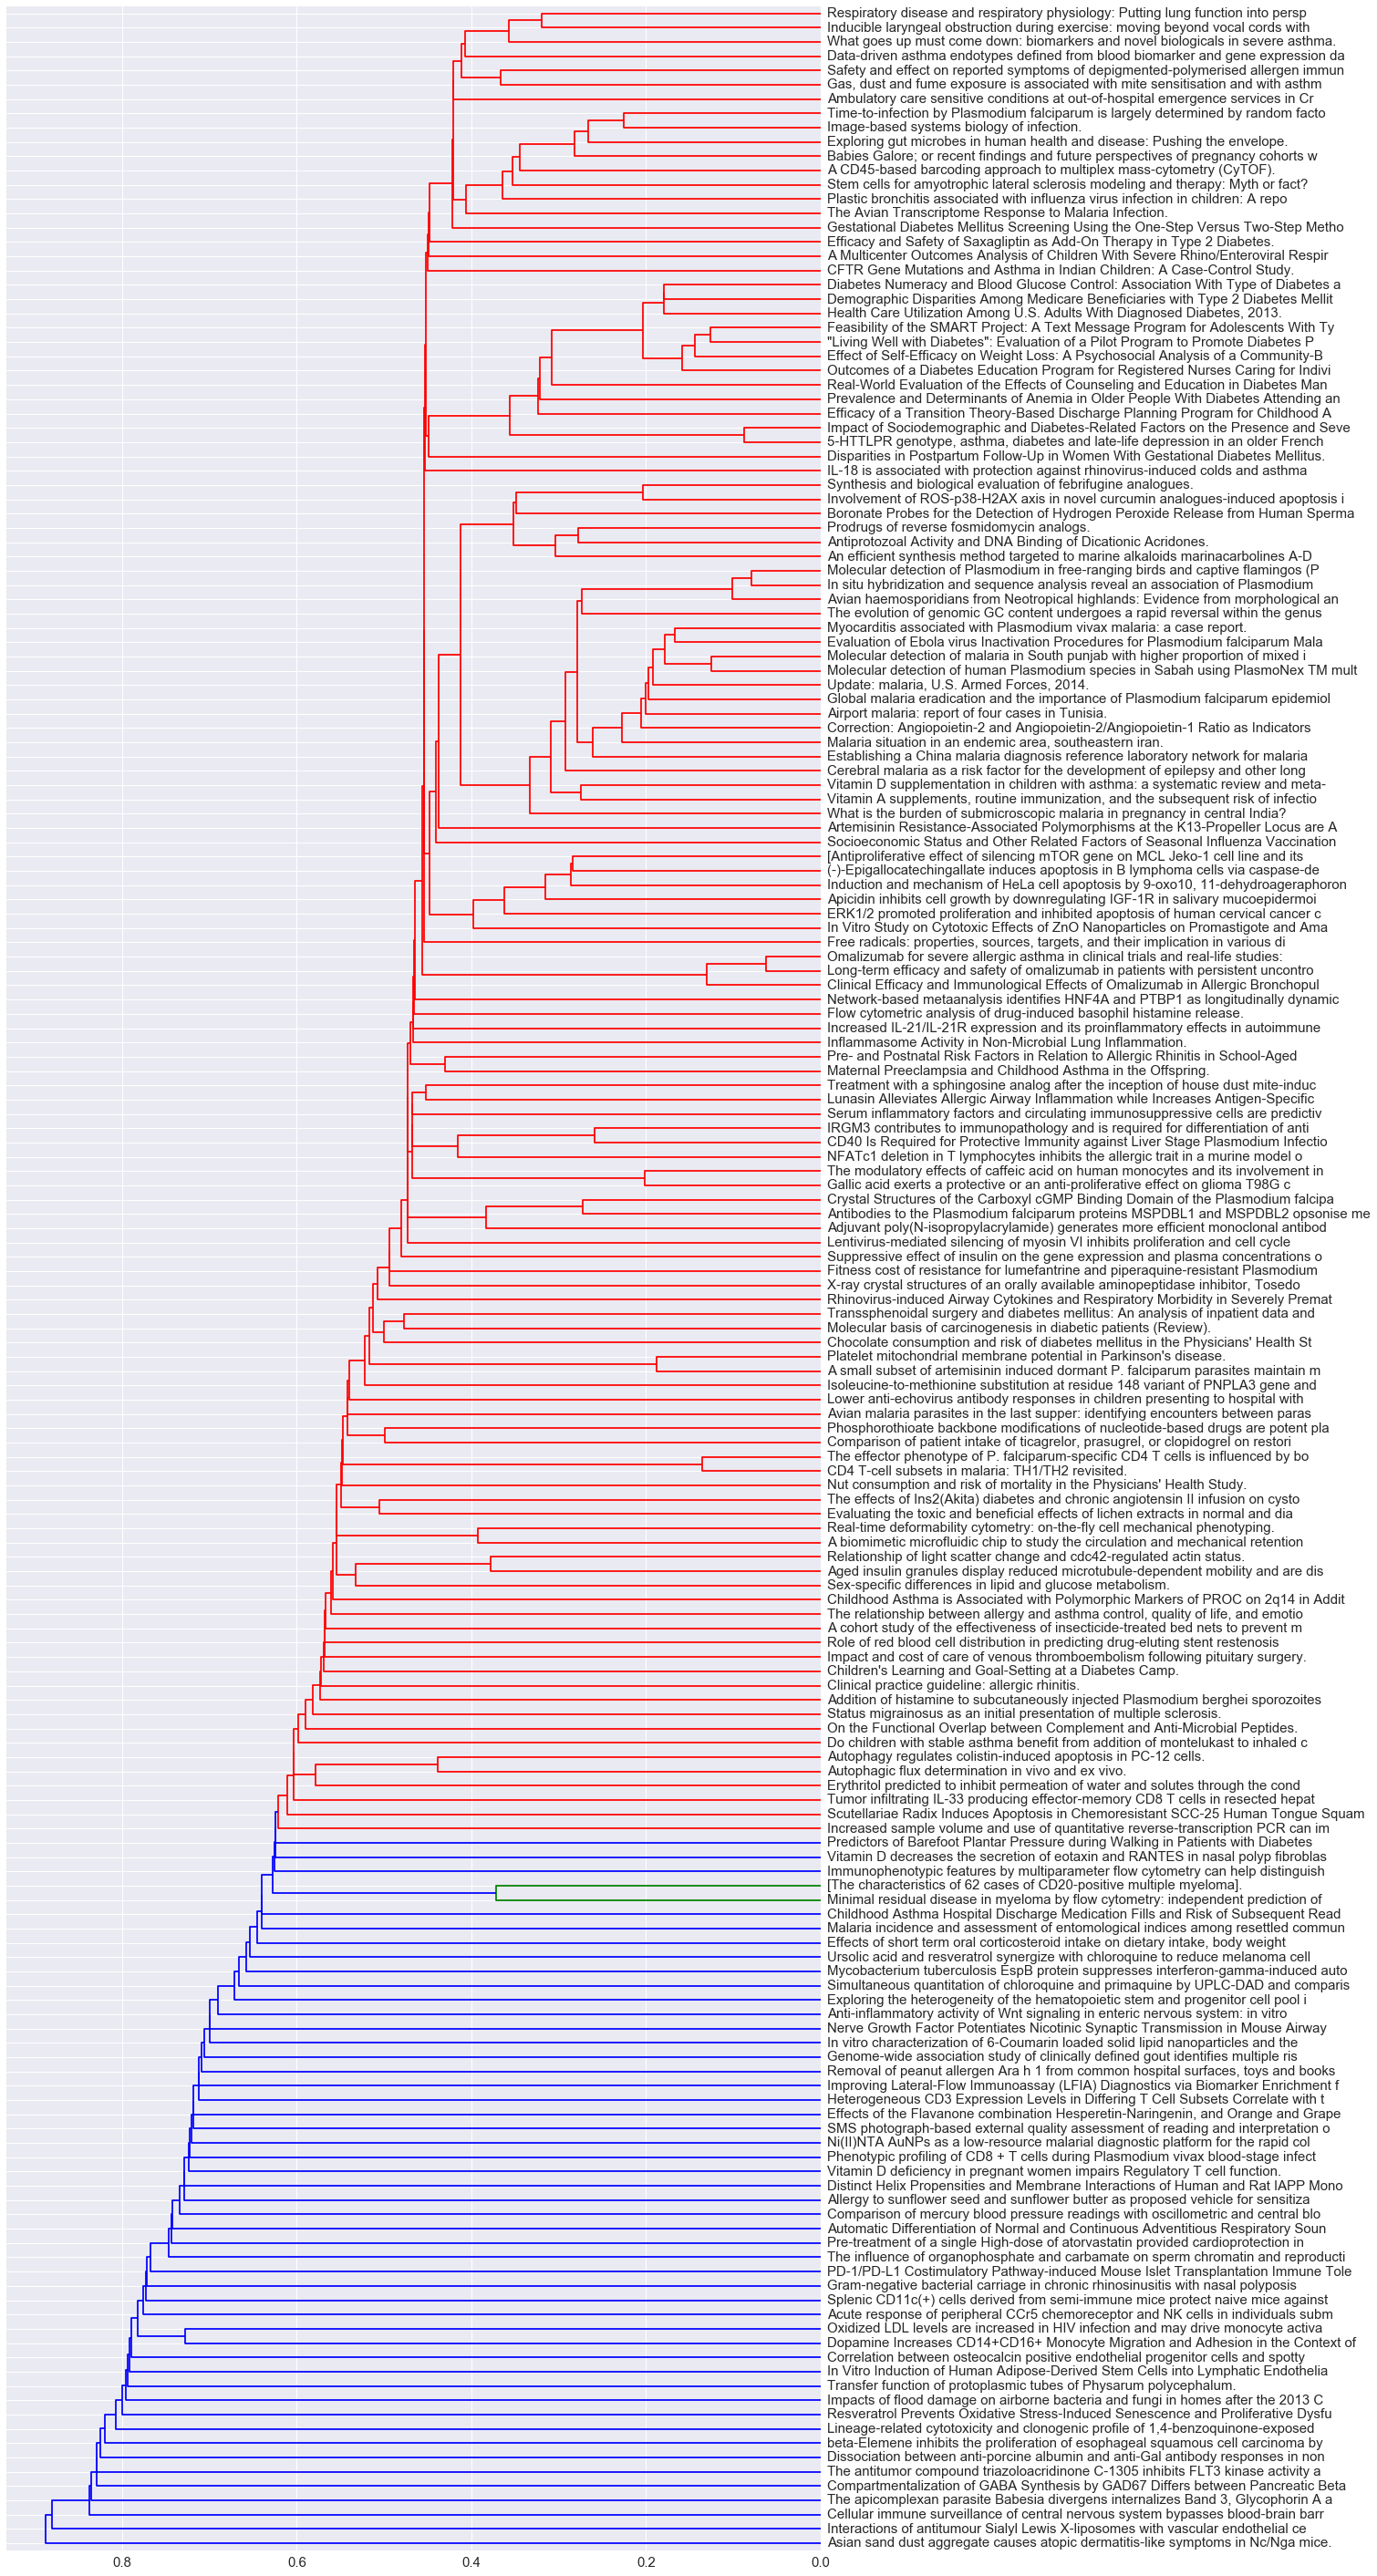

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

plt.figure(figsize=(16,50))
T, s, D = sparsesvd(csc_matrix(df), k=100)
x = np.diag(s).dot(D).T
data_dist = pdist(x, metric='cosine') # computing the distance
data_link = linkage(data_dist) # computing the linkage
labels = [c[:80] for c in df.columns[:]]
dendrogram(data_link, orientation='right', labels=labels);

In [27]:
def squared_euclidean_norm(u, axis=-1):
    return (u**2).sum(axis)

def euclidean_norm(u, axis=-1):
    return np.sqrt(squared_euclidean_norm(u, axis))

def cosine_dist(u, v, axis=-1):
    """Returns cosine of angle betwwen two vectors."""
    # return 1 - np.dot(u, v)/(la.norm(u)*la.norm(v))
    return 1 - (u * v).sum(axis)/(euclidean_norm(u, axis) * euclidean_norm(v, axis))

In [28]:
k=100
T, s, D = sparsesvd(csc_matrix(df), k=k)

doc = {'mystery': open('mystery.txt').read()}
terms = tf_idf(doc)
query_terms = df.join(terms).fillna(0)['mystery']
q = query_terms.T.dot(T.T.dot(np.diag(1.0/s)))

ranked_docs = df.columns[np.argsort(cosine_dist(q, x))][::-1]
print("Query article:")
print(' '.join(line.strip() for line in doc['mystery'].splitlines()[:2]))
print()
print("Most similar")
print('='*80)
for i, title in enumerate(ranked_docs[:10]):
    print('%03d' % i, title)

print()
print("Most dissimilar")
print('='*80)
for i, title in enumerate(ranked_docs[-10:]):
    print('%03d' % (len(docs) - i), title)

Query article:
﻿Intensive blood-glucose control with sulphonylureas or insulin compared with conventional treatment and risk of complications in patients with type 2 diabetes

Most similar
000 Diabetes Numeracy and Blood Glucose Control: Association With Type of Diabetes and Source of Care.
001 Feasibility of the SMART Project: A Text Message Program for Adolescents With Type 1 Diabetes.
002 Health Care Utilization Among U.S. Adults With Diagnosed Diabetes, 2013.
003 Demographic Disparities Among Medicare Beneficiaries with Type 2 Diabetes Mellitus in 2011: Diabetes Prevalence, Comorbidities, and Hypoglycemia Events.
004 Disparities in Postpartum Follow-Up in Women With Gestational Diabetes Mellitus.
005 Prevalence and Determinants of Anemia in Older People With Diabetes Attending an Outpatient Clinic: A Cross-Sectional Audit.
006 Outcomes of a Diabetes Education Program for Registered Nurses Caring for Individuals With Diabetes.
007 Gestational Diabetes Mellitus Screening Using the On

The invere-document-frequency cacluated by idf() penalizes terms that are common across many doucments by giving them a small weight. In particular, terms that appear in every document will have an idf weight of 0. Hence, there is gnerally no need to filter out the boilerplate text - these terms will not play any role in clustering or seaching in low dimensions.

One potential issue is when the terms in the boilerplate mask possibly meaningful terms in the text - for example, if you are clustering legal documents, the term "copyright" in the boilerplate may mask useful information for clustering IP-related documents that also use "copyright" in the actual text. In such cases, we would need to filter out boilerplate.

So either answer is fine, so long as it is justified.